ML Assignments: Training the faculty

Assignment - 3 Building a perceptron

In [1]:
# Building a perceptron

import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Add bias input as 1 to the input vector
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation_function(z)

    def fit(self, X, y):
        # X: input features, y: target values
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = X[i]
                y_pred = self.predict(x_i)
                error = y[i] - y_pred
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * x_i
                self.weights[0] += self.learning_rate * error  # update the bias term

# Example usage
if __name__ == "__main__":
    # Sample data: OR gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 1, 1, 1])  # Expected outputs

    # Initialize and train the perceptron
    perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
    perceptron.fit(X, y)

    # Test the perceptron
    for x in X:
        print(f"Input: {x}, Predicted Output: {perceptron.predict(x)}")


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


Mini-Project

Tasks:

Build CNNs for image classification using datasets like CIFAR-10Convolutional Neural Network (CNN) using PyTorch to classify images from the CIFAR-10 dataset. CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.​

Steps:

1. Load and preprocess the CIFAR-10 dataset.

2. Define a CNN architecture.

3. Train the network.

4. Evaluate its performance on the test data.

Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


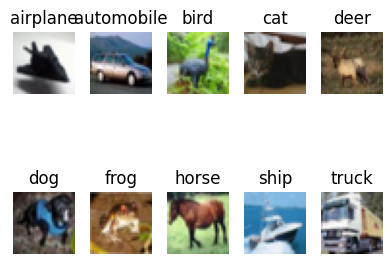

Epoch [1/10], Loss: 1.3852
Epoch [2/10], Loss: 1.0171
Epoch [3/10], Loss: 0.8708
Epoch [4/10], Loss: 0.7689
Epoch [5/10], Loss: 0.6751
Epoch [6/10], Loss: 0.5958
Epoch [7/10], Loss: 0.5239
Epoch [8/10], Loss: 0.4617
Epoch [9/10], Loss: 0.4104
Epoch [10/10], Loss: 0.3584


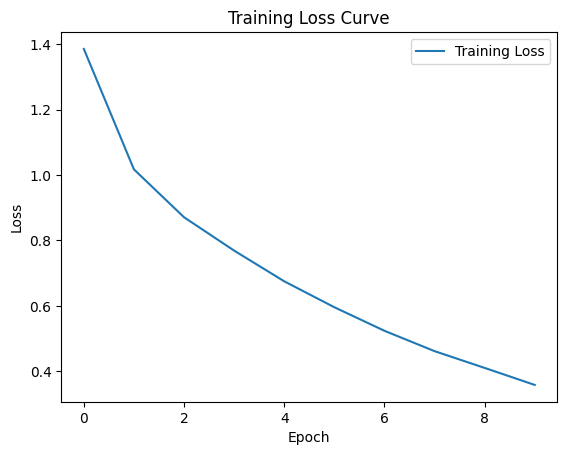

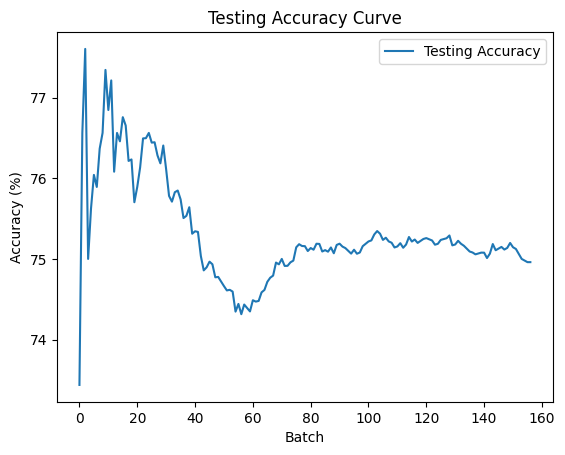

Test Accuracy: 74.96%


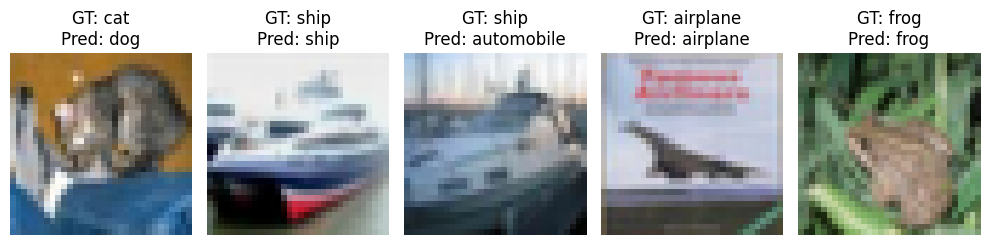

In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Display CIFAR-10 class names
classes = train_dataset.classes
print("CIFAR-10 Classes:", classes)

# Function to display one image from each class
def display_images_from_each_class(dataset, classes):
    class_images = {cls: None for cls in classes}
    found_classes = set()

    for img, label in dataset:
        class_name = classes[label]
        if class_name not in found_classes:
            class_images[class_name] = img
            found_classes.add(class_name)
        if len(found_classes) == len(classes):
            break

    # Display images
    plt.figure(figsize=(4, 4))
    for idx, (class_name, img) in enumerate(class_images.items()):
        plt.subplot(2, 5, idx + 1)
        img = img / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display images from each class before training
display_images_from_each_class(train_dataset, classes)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and plot the training curve
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Plot training loss
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.show()

# Test the model and plot the testing curve
def test_model(model, test_loader):
    model.eval()
    test_accuracies = []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_accuracies.append(100 * correct / total)

    # Plot testing accuracy
    plt.plot(test_accuracies, label='Testing Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy (%)')
    plt.title('Testing Accuracy Curve')
    plt.legend()
    plt.show()

    print(f'Test Accuracy: {test_accuracies[-1]:.2f}%')

# Display five test images with predictions
def display_test_images(model, test_loader):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    images = images.cpu()

    plt.figure(figsize=(4, 4))
    for idx in range(5):
        plt.subplot(1, 5, idx + 1)
        img = images[idx] / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f"GT: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Train, test, and display results
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
test_model(model, test_loader)
display_test_images(model, test_loader)
